# Import Libraries

In [3]:
#If need to reimport something
def rel(name):
    importlib.reload(sys.modules[name])

In [32]:
import numpy as np
import pandas as pd
import sys, importlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from skRandomForest import skRandomForest
from sklearn.tree import DecisionTreeRegressor
rel('skRandomForest')
import tqdm
import Evaluator
from IPython.display import clear_output

 # Build Data

In [33]:
from DataBuilder import DataBuilder
rel('DataBuilder')
rel('MLData')
rel('Heuristics')

databuilder = DataBuilder(applyFilter=False, heuristic=True)

100%|██████████| 1/1 [05:32<00:00, 332.81s/it]


In [34]:
X_Train, y_Train, X_Test, y_Test = databuilder.confs['data3']['conf5']

In [35]:
databuilder.confs.keys()

dict_keys(['data3'])

In [36]:
def remove_nan(array):
    indices = np.where(np.isnan(array))
    array[indices] = 0
    return array

skRF = skRandomForest()
model = skRF.best_model(metric = 'mae')
X_train = remove_nan(X_Train)
X_Test = remove_nan(X_Test)

These are the best parameters {'rf__max_depth': 60, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 250}
60
[60]
3
[3]
8
[8]
250
[250]


In [37]:
model.fit(X_Train, y_Train.ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [60], 'rf__min_samples_leaf': [3],
                         'rf__min_samples_split': [8],
                         'rf__n_estimators': [250]},
             verbose=3)

In [38]:
preds = model.predict(X_Test)
mean_absolute_error(preds, y_Test)

0.27303599872124285

In [39]:
# # importances = forest.feature_importances_
# importances.shape

In [40]:
import Heuristics
rel('Heuristics')
labels = Heuristics.get_labels()

Feature ranking:


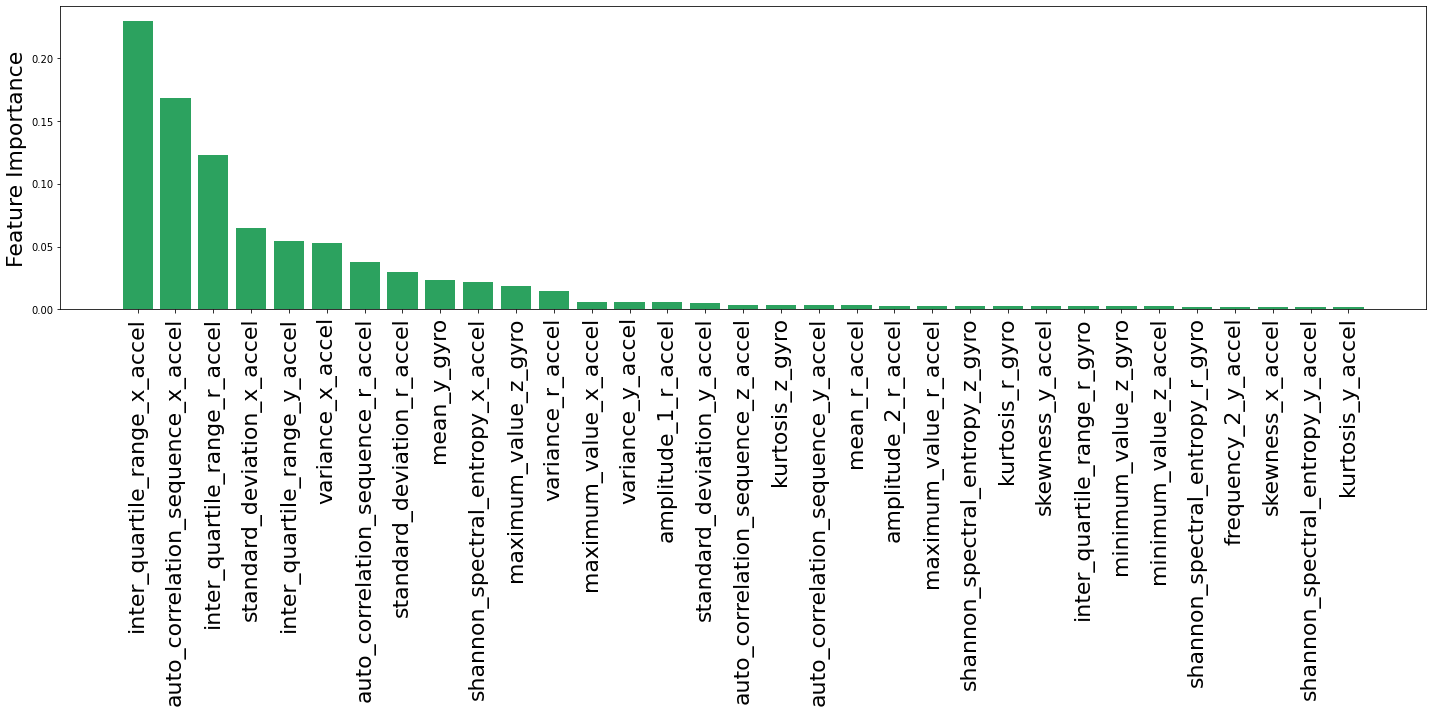

In [41]:
forest = model.best_estimator_['rf']
X= X_Test
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indi ces[f]]))
        
plt.figure(figsize  = (20,10))
#plt.title("Feature importances")
plt.bar(range(X.shape[1])[:33], 
        importances[indices][:33],
        color="#2ca25f", 
       # yerr=std[indices][:33],
        align="center")
plt.xticks(range(X.shape[1])[:33], labels[indices[:33]], rotation='vertical', size = 22)
plt.ylabel("Feature Importance", fontsize =22)
#plt.xlim([-1, X.shape[1]][:12])
plt.tight_layout()
plt.savefig("feature_importance1.png")
plt.show()

In [48]:
range(X.shape[1])[:12]
importances[indices][:12]
range(X.shape[1])[:12]

range(0, 12)

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

In [49]:
Heuristics.HeuristicBuilder(np.random.randn(150)).shape

(16,)

In [50]:
print("These are the top 12 important features:\n")
print(labels[indices][:12])

These are the top 12 important features:

['inter_quartile_range_x_accel' 'auto_correlation_sequence_x_accel'
 'inter_quartile_range_r_accel' 'inter_quartile_range_y_accel'
 'standard_deviation_x_accel' 'auto_correlation_sequence_r_accel'
 'variance_x_accel' 'standard_deviation_r_accel'
 'shannon_spectral_entropy_x_accel' 'mean_y_gyro' 'maximum_value_z_gyro'
 'variance_r_accel']


In [51]:
from sklearn.ensemble import RandomForestRegressor
def train_top_heur(count):
    top = count
    X_Train_top = [item[:top] for item in X_Train]
    y_Train_top = y_Train
    X_Test_top = [item[:top] for item in X_Test]
    y_Test_top = y_Test 
    #Load the model and fit with the top data
    
    #skRF = skRandomForest()
    #model = skRF.best_model(metric = 'mae')
    mod = RandomForestRegressor()
    mod.fit(X_Train_top, y_Train_top.ravel())
    print("Results after training on top 28 features")
    preds_top = mod.predict(X_Test_top)
    result = mean_absolute_error(preds_top, y_Test_top)
    return result

100%|██████████| 126/126 [04:11<00:00,  2.00s/it]


Text(0, 0.5, 'Mean Absolute Error')

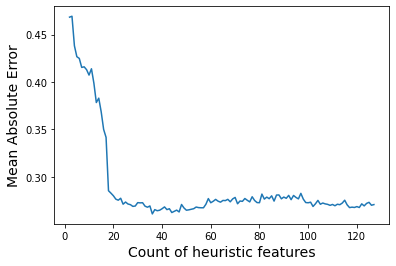

In [52]:
heuristic_range = np.arange(2,len(labels))
accuracies = list()

for count in tqdm.tqdm(heuristic_range):
    accuracies.append(train_top_heur(count))
    clear_output(wait=True)

plt.plot(heuristic_range, accuracies)
plt.xlabel('Count of heuristic features', fontsize = 14)
plt.ylabel('Mean Absolute Error', fontsize = 14)

In [53]:
min(accuracies)

0.2606715176715174

In [56]:
plt.figure(figsize = (7,7))
ax = plt.subplot()
ax.plot(heuristic_range, accuracies, )
ax.scatter(heuristic_range, accuracies,color = '#99d594',s = 50 )
ax.plot(heuristic_range, accuracies, color = '#3288bd' )
ax.scatter(33, 0.26793156740938856, color = 'red', marker = 'D',s = 150)
ax.scatter(heuristic_range, accuracies,color = 'black',s = 10 )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Count of heuristic features', fontsize = 14)
ax.set_ylabel('Mean absolute error', fontsize = 14)

text = 'MAE = 0.267 \n Heuristic feature count = 33'
plt.arrow(33, 0.265, 2, 0.027, linestyle='--', shape = 'right')

# plt.arrow(0, 0.26793156740938856, 33, 0, linestyle='--', shape = 'right')
# plt.arrow(33, 0.25, 0, 0.26793156740938856, linestyle='--', shape = 'right')

plt.annotate(text, # this is the text
                 (34,0.29), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 size = 12,
                 ha='center',bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 5}) # horizontal alignment can be left, right or center
#plt.grid(alpha = 0.5)
ax.tick_params(axis = 'both', size =10, labelsize =12)
#plt.show()
plt.tight_layout()
plt.savefig('heur_best1.png')
%matplotlib inline

In [36]:
list(zip(np.arange(20,40),accuracies[20:40]))

[(20, 0.5379438669438669),
 (21, 0.5266133056133057),
 (22, 0.5274074844074844),
 (23, 0.5273326403326402),
 (24, 0.5208814968814968),
 (25, 0.5165613305613305),
 (26, 0.5173555093555092),
 (27, 0.5118004158004156),
 (28, 0.5142390852390851),
 (29, 0.5122515592515593),
 (30, 0.5090748440748439),
 (31, 0.5115218295218296),
 (32, 0.5086839916839917),
 (33, 0.5114844074844074),
 (34, 0.5115904365904366),
 (35, 0.505956340956341),
 (36, 0.5078648648648648),
 (37, 0.5105114345114344),
 (38, 0.5014823284823283),
 (39, 0.5052266112266113)]

## Use a decision tree classifier with lesser depth to build an explainable model.

In [ ]:
expMod = DecisionTreeRegressor(max_depth = 3)
expMod.fit(X_Train_top, y_Train_top.ravel())

In [ ]:
expPreds = expMod.predict(X_Test_top)
mean_absolute_error(expPreds, y_Test_top)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(expMod, feature_names=labels[indices][:top])
plt.show()
%matplotlib inline

In [ ]:
# Condense the data to use only the important features


# Train the algorithm again only with the important features


# Use decision tree to visualize how it looks after you get the data ready



## Test with butterworth bandpass filter

In [ ]:
import pandas as pd 

df = pd.read_csv('Cardio_Data/Cleaned_data_full/Abhijit/6.0.csv')
res = df['Accel_LN_X_CAL']
plt.plot(df.index, res)

In [ ]:
from scipy.signal import butter, sosfilt

but = butter(N = 4, Wn = (0.5,10), btype = 'bandpass', fs = 51.1, output = 'sos')
filtsig = sosfilt(but, res)
plt.plot(df.index, filtsig)

In [ ]:
df.columns

In [ ]:
t = np.linspace(0, 1, 1000, False)  # 1 second
a = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)

In [ ]:
a.shape

# Data Generation through SMOTE algorithm

In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
sm = SMOTENC(random_state = 31)

In [ ]:
print(X_Train.shape, y_Train.shape)

In [ ]:
X_Train_res , y_Train_res = sm.fit_resample(X_Train, y_Train)

# Use SMOGN

In [ ]:
%%capture
!pip install git+https://github.com/nickkunz/smogn.git


In [ ]:
X_df = pd.DataFrame(X_Train)

In [ ]:
X_df['label'] = y_Train
X_df.head()

In [ ]:
import smogn
## specify phi relevance values
rg_mtrx = [

    [35000,  1, 0],  ## over-sample ("minority")
    [125000, 0, 0],  ## under-sample ("majority")
    [200000, 0, 0],  ## under-sample
    [250000, 0, 0],  ## under-sample
]
resSMOGN = smogn.smoter(
    
    ## main arguments
    data = X_df,           ## pandas dataframe
    y = 'label',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'auto',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

# Bring in the algorithm

In [ ]:
from skLinearRegression import skLinearRegression
skLR = skLinearRegression()
model = skLR.model

# Plug the evaluator to LR grid

In [ ]:
#from Evaluator import Evaluator

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skLR.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

In [ ]:
#Typical reload command
rel('skRandomForest')

# RandomForest Regressor

In [ ]:
rel('Evaluator')
from skRandomForest import skRandomForest
skRF = skRandomForest()
model = skRF.model

# Train RF

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skRF.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

Best Random Forest Model

In [13]:
X_Train, y_Train, X_Test, y_Test = databuilder.confs['data3']['conf5']

In [29]:
skRF = skRandomForest()
bestModelRF = skRF.best_model('mae')
bestModelRF.fit(X_Train, y_Train.flatten())

These are the best parameters {'rf__max_depth': 60, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 250}
60
[60]
3
[3]
8
[8]
250
[250]
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.1s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [60], 'rf__min_samples_leaf': [3],
                         'rf__min_samples_split': [8],
                         'rf__n_estimators': [250]},
             verbose=3)

In [30]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
mean_absolute_error(bestModelRF.predict(X_Test), y_Test)
r2_score(bestModelRF.predict(X_Test), y_Test)

0.485368610071245

In [31]:
# from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mean_absolute_percentage_error(bestModelRF.predict(X_Test), y_Test.flatten())

9.530981976906656

# Gaussian Process Regression

In [ ]:
rel('skGaussianProcess')
rel('Evaluator')

from skGaussianProcess import skGaussianProcess

skGP = skGaussianProcess()
model = skGP.model

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skGP.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()

In [ ]:
gp.get_params()

# Kmeans + RandomForest

## Test with the best conf, framesize random forest configuraions.

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from Evaluator import mean_absolute_percentage_error



In [ ]:
skKM = KMeans(n_clusters=2,max_iter = 10000000)
confData = dataBuilder.confs['data1']['conf5']

train_cluster_indices = list()
test_cluster_indices = list()

skKM.fit(confData[0])
preds = skKM.transform(confData[0])
labels = skKM.labels_


In [ ]:
# plt.scatter(confData[1],confData[1], c=['blue' if a ==0 else 'red' for a in labels], alpha = 0.1)
df = pd.DataFrame(data = np.hstack((confData[1], labels.reshape(-1,1))), columns = ['speed', 'label'])

In [ ]:
clust1 = np.where(labels==0)
clust2 = np.where(labels==1)

X_Train1 = np.take(confData[0], clust1,axis=0)[0]
y_Train1 = np.take(confData[1], clust1,axis=0)[0]

X_Train2 = np.take(confData[0], clust2,axis=0)[0]
y_Train2 = np.take(confData[1], clust2,axis=0)[0]

In [ ]:
preds = skKM.predict(confData[2])

In [ ]:
c1 = np.where(preds==0)
c2 = np.where(preds==1)

X_Test1 = np.take(confData[2], c1,axis=0)[0]
y_Test1 = np.take(confData[3], c1,axis=0)[0]

X_Test2 = np.take(confData[2], c2,axis=0)[0]
y_Test2 = np.take(confData[3], c2,axis=0)[0]

In [ ]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [
    #('pca',pca), 
    ('rf', rf)])


pipe.fit(X_Train1, y_Train1.flatten())

preds1 = pipe.predict(X_Test1)

r1 = [mean_absolute_error(preds1, y_Test1), r2_score(preds1, y_Test1), mean_absolute_percentage_error(preds1, y_Test1)]
print(r1)

plt.scatter(y_Test1,preds1)
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [('rf', rf)])

pipe.fit(X_Train2, y_Train2.flatten())

preds2 = pipe.predict(X_Test2)

r2 = [mean_absolute_error(preds2, y_Test2), r2_score(preds2, y_Test2), mean_absolute_percentage_error(preds2, y_Test2)]

print(r2)
plt.scatter(y_Test2,preds2)
plt.figure(figsize=(7,7))
plt.show()

In [ ]:
print("Overall results for clustering + Regression : {}".format((r1+r2)/2))


In [ ]:
(np.array(r1) + np.array(r2))/2

# Classifier + RandomForest


In [11]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
databuilder = DataBuilder(applyFilter=False, heuristic=False)

X_Train, y_Train, X_Test, y_Test = databuilder.confs['data3']['conf5']

100%|██████████| 3/3 [00:20<00:00,  6.88s/it]


In [13]:
confData = databuilder.confs['data1']['conf5']
s = 4.2

In [14]:
classes = np.array([0 if speed< s else 1 for speed in confData[1]])
cls1 = np.where(classes==0)
cls2 = np.where(classes==1)

X_Train1 = np.take(confData[0], cls1,axis=0)[0]
y_Train1 = np.take(confData[1], cls1,axis=0)[0]

X_Train2 = np.take(confData[0], cls2,axis=0)[0]
y_Train2 = np.take(confData[1], cls2,axis=0)[0]

In [15]:
clas = np.array([0 if speed< s else 1 for speed in confData[3]])

c1 = np.where(clas==0)
c2 = np.where(clas==1)

X_Test1 = np.take(confData[2], c1,axis=0)[0]
y_Test1 = np.take(confData[3], c1,axis=0)[0]

X_Test2 = np.take(confData[2], c2,axis=0)[0]
y_Test2 = np.take(confData[3], c2,axis=0)[0]

In [16]:
clf = svm.SVC()
clf.fit(confData[0],classes)

SVC()

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(confData[2]), clas)

0.9251129761136216

9.821905709688716
[0.24302659266224966, -1.6253025777786143, 9.821905709688716]


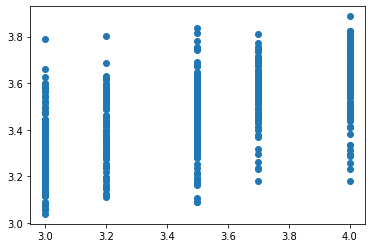

<Figure size 504x504 with 0 Axes>

In [20]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [
    ('pca',pca), 
    ('rf', rf)])


pipe.fit(X_Train1, y_Train1.flatten())

preds1 = pipe.predict(X_Test1)

r1 = [mean_absolute_error(preds1, y_Test1), r2_score(preds1, y_Test1), mean_absolute_percentage_error(preds1, y_Test1)]

print(r1)

plt.scatter(y_Test1,preds1)
plt.figure(figsize=(7,7))
plt.show()

14.01972075489389
[0.43079399073581887, -0.6219772975306166, 14.01972075489389]


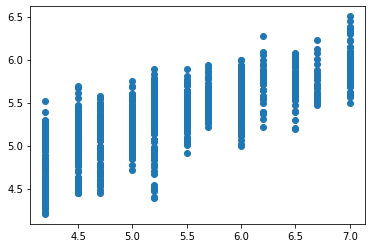

<Figure size 504x504 with 0 Axes>

In [21]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [('rf', rf)])

pipe.fit(X_Train2, y_Train2.flatten())

preds2 = pipe.predict(X_Test2)

r2 = [mean_absolute_error(preds2, y_Test2), r2_score(preds2, y_Test2), mean_absolute_percentage_error(preds2, y_Test2)]
print(r2)

plt.scatter(y_Test2,preds2)
plt.figure(figsize=(7,7))
plt.show()

In [23]:
print("Overall results for clustering + Regression : {}".format(((np.array(r1)+np.array(r2))/2)))

Overall results for clustering + Regression : [ 0.33691029 -1.12363994 11.92081323]


In [24]:
print(r1)

[0.24302659266224966, -1.6253025777786143, 9.821905709688716]


In [25]:
print(r2)

[0.43079399073581887, -0.6219772975306166, 14.01972075489389]
